#<데이터 불러오기>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 기본 한글 폰트로 설정
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'C:/Windows/Fonts/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
plt.rcParams['font.family'] = 'NanumGothic'

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 무시
import random, warnings
warnings.filterwarnings("ignore")

Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/sales_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/sample_submission.csv')
shops_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/shops.csv')
items_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/items.csv')
item_cat_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/item_categories.csv')

#<이상치 처리1 - 중앙값, 박스플롯>

1. 음수 값

In [ ]:
# 음수인 데이터 확인
negative_values = train_df[train_df['item_cnt_day'] < 0]
print("음수인 데이터:")
print(negative_values)

음수인 데이터:
               date  date_block_num  shop_id  item_id  item_price  \
2        05.01.2013               0       25     2552       899.0   
148      23.01.2013               0       25     2321       999.0   
175      07.01.2013               0       25     2199      1449.0   
807      02.01.2013               0       25     2330       599.0   
1041     13.01.2013               0       25     5034      1989.0   
...             ...             ...      ...      ...         ...   
2934243  26.10.2015              33       25     3917       449.0   
2934462  18.10.2015              33       25     4896      6398.0   
2935263  05.10.2015              33       25    10039       249.0   
2935643  16.10.2015              33       25     7893      2990.0   
2935779  07.10.2015              33       25     7087       999.0   

         item_cnt_day  
2                -1.0  
148              -1.0  
175              -1.0  
807              -1.0  
1041             -1.0  
...               

In [ ]:
# item_cnt_day 변수가 음수인 행들을 0으로 변경
train_df.loc[train_df['item_cnt_day'] < 0, 'item_cnt_day'] = 0

print(train_df)

               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                 0.0  
3                 1.0  
4                 1.0  
...               ...  
293

In [ ]:
# 음수인 데이터 확인
negative_values = train_df[train_df['item_price'] < 0]
print("음수인 데이터:")
print(negative_values)

음수인 데이터:
              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683  15.05.2013               4       32     2973        -1.0           1.0


In [ ]:
# item_price 변수가 음수인 행들을 0으로 변경
train_df.loc[train_df['item_price'] < 0, 'item_price'] = 0

print(train_df)

               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                 0.0  
3                 1.0  
4                 1.0  
...               ...  
293

2. item_price, item_cnt_day 이상치

In [ ]:
pip install scikit-learn pandas

PCA 결과에서 이상치:
          item_price  item_cnt_day
1163158  126.241706     15.506166
2326930    5.629769    110.915558
2909818   14.363570    240.128830

원본 데이터에서 이상치:
                date  date_block_num  shop_id  item_id     item_price  \
1163158  13.12.2013              11       12     6066  307980.000000   
2326930  15.01.2015              24       12    20949       4.000000   
2909818  28.10.2015              33       12    11373       0.908714   

         item_cnt_day  
1163158           1.0  
2326930        1000.0  
2909818        2169.0  


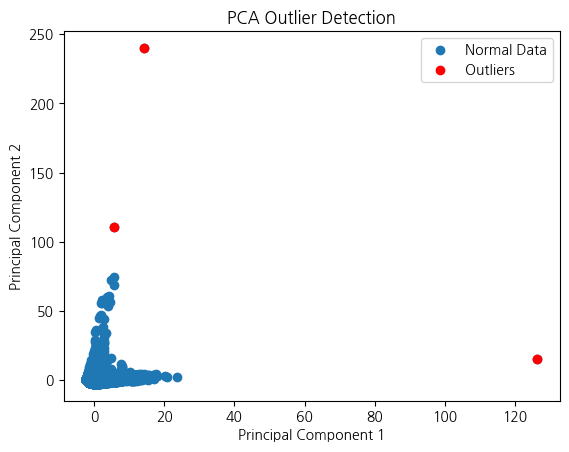

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 수치형 데이터만 선택
numeric_df = train_df.select_dtypes(include=[np.number])

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# PCA 수행
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=pca_data, columns=['item_price', 'item_cnt_day'])

# 이상치 탐지 (z-점수 기준)
def find_outliers_pca(pca_df, threshold=100):
    z_scores = np.abs(pca_df.apply(zscore))
    outliers = (z_scores > threshold).any(axis=1)
    return pca_df[outliers]

# z-점수를 계산하는 함수
def zscore(series):
    return (series - series.mean()) / series.std()

# 이상치 찾기
outliers_pca = find_outliers_pca(pca_df)
print("PCA 결과에서 이상치:\n", outliers_pca)

# 원본 데이터의 이상치 인덱스
outlier_indices = outliers_pca.index
original_outliers = train_df.loc[outlier_indices]
print("\n원본 데이터에서 이상치:\n", original_outliers)

# PCA 결과 시각화
plt.scatter(pca_df['item_price'], pca_df['item_cnt_day'], label='Normal Data')
plt.scatter(outliers_pca['item_price'], outliers_pca['item_cnt_day'], color='red', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Outlier Detection')
plt.show()

In [ ]:
# 각 열의 중앙값 계산
medians = train_df['item_price'].median()
print(medians)

399.0


In [ ]:
def change_value(df, row_index, column_name, new_value):
    train_df.at[row_index, column_name] = new_value

row_index = 1163158
column_name = 'item_price'
new_value = 399.0

change_value(train_df, row_index, column_name, new_value)

In [ ]:
train_df.loc[1163158]

date              13.12.2013
date_block_num            11
shop_id                   12
item_id                 6066
item_price             399.0
item_cnt_day             1.0
Name: 1163158, dtype: object

In [ ]:
items_df.loc[6066]

item_name           Radmin 3  - 522 лиц.
item_id                             6066
item_category_id                      75
Name: 6066, dtype: object

In [ ]:
item_cat_df.loc[75]

item_category_name    Программы - Для дома и офиса
item_category_id                                75
Name: 75, dtype: object

Program - For home and office (프로그램-가정 및 사무실용)

<Axes: ylabel='item_price'>

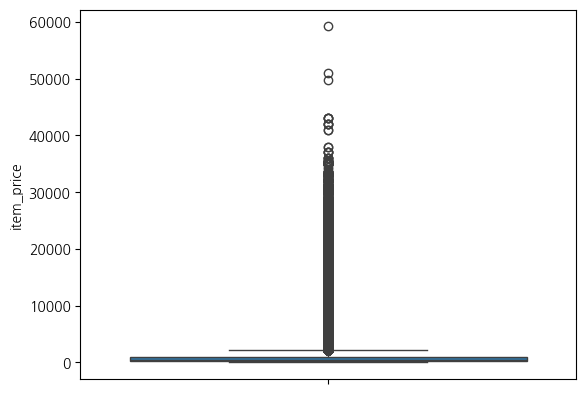

In [ ]:
sns.boxplot(y='item_price', data=train_df)

In [ ]:
# 각 열의 중앙값 계산
medians = train_df['item_cnt_day'].median()
print(medians)

1.0


In [ ]:
# column_name 열에서 특정 값 이상인 데이터 행 확인
filtered_rows = train_df[train_df['item_cnt_day'] >= 1000].index.tolist()

# 확인된 데이터 행 출력
print(filtered_rows)

[2326930, 2909818]


In [ ]:
row_index = 2326930, 2909818
column_name = 'item_cnt_day'
new_value = 1.0

change_value(train_df, row_index, column_name, new_value)

<Axes: ylabel='item_cnt_day'>

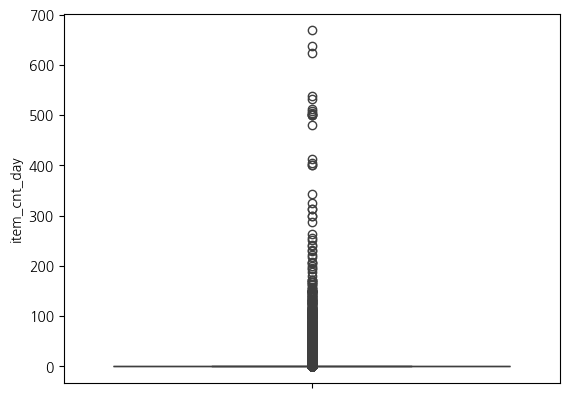

In [ ]:
sns.boxplot(y='item_cnt_day', data=train_df)

#<데이터프레임 병합 및 파생변수>

In [ ]:
shops_en = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/shops_en.csv')
items_en = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/items_en.csv')
item_cat_en = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/item_categories_en.csv')

In [ ]:
#데이터프레임 병합
# 첫 번째 병합
train_with_shops = train_df.merge(shops_en, on='shop_id', how='left')

# 두 번째 병합
train_with_shops_and_items = train_with_shops.merge(items_en, on='item_id', how='left')

# 세 번째 병합
train_merged = train_with_shops_and_items.merge(item_cat_en, on='item_category_id', how='left')

# 최종 병합된 데이터프레임 확인
train_merged.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Yaroslavl shopping center ""Altair""",Scene 2012 (BD),37,Movies - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl
2,05.01.2013,0,25,2552,899.00,0.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl
3,06.01.2013,0,25,2554,1709.05,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl
4,15.01.2013,0,25,2555,1099.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - CD production firm


In [ ]:
# date_block_num와 item_cnt_day를 그룹화하고 item_cnt_month 파생변수 생성
train_merged['item_cnt_month'] = train_merged.groupby('date_block_num')['item_cnt_day'].transform('sum')

# 결과 확인
train_merged.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,item_cnt_month
0,02.01.2013,0,59,22154,999.00,1.0,"Yaroslavl shopping center ""Altair""",Scene 2012 (BD),37,Movies - Blu-Ray,131850.0
1,03.01.2013,0,25,2552,899.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,131850.0
2,05.01.2013,0,25,2552,899.00,0.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,131850.0
3,06.01.2013,0,25,2554,1709.05,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,131850.0
4,15.01.2013,0,25,2555,1099.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - CD production firm,131850.0


#<이상치 처리2 - 카테고리별>

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/sales_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/sample_submission.csv')
shops_en = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/shops_en.csv')
items_en = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/items_en.csv')
item_cat_en = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/item_categories_en.csv')

In [ ]:
# 음수인 데이터 확인
negative_values = train_df[train_df['item_cnt_day'] < 0]
print("음수인 데이터:")
print(negative_values)

음수인 데이터:
               date  date_block_num  shop_id  item_id  item_price  \
2        05.01.2013               0       25     2552       899.0   
148      23.01.2013               0       25     2321       999.0   
175      07.01.2013               0       25     2199      1449.0   
807      02.01.2013               0       25     2330       599.0   
1041     13.01.2013               0       25     5034      1989.0   
...             ...             ...      ...      ...         ...   
2934243  26.10.2015              33       25     3917       449.0   
2934462  18.10.2015              33       25     4896      6398.0   
2935263  05.10.2015              33       25    10039       249.0   
2935643  16.10.2015              33       25     7893      2990.0   
2935779  07.10.2015              33       25     7087       999.0   

         item_cnt_day  
2                -1.0  
148              -1.0  
175              -1.0  
807              -1.0  
1041             -1.0  
...               

In [ ]:
# item_cnt_day 변수가 음수인 행들을 0으로 변경
train_df.loc[train_df['item_cnt_day'] < 0, 'item_cnt_day'] = 0

print(train_df)

               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                 0.0  
3                 1.0  
4                 1.0  
...               ...  
293

In [ ]:
# 음수인 데이터 확인
negative_values = train_df[train_df['item_price'] < 0]
print("음수인 데이터:")
print(negative_values)

음수인 데이터:
              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683  15.05.2013               4       32     2973        -1.0           1.0


In [ ]:
# item_price 변수가 음수인 행들을 0으로 변경
train_df.loc[train_df['item_price'] < 0, 'item_price'] = 0

print(train_df)

               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                 0.0  
3                 1.0  
4                 1.0  
...               ...  
293

In [ ]:
#데이터프레임 병합
# 첫 번째 병합
train_with_shops = train_df.merge(shops_en, on='shop_id', how='left')

# 두 번째 병합
train_with_shops_and_items = train_with_shops.merge(items_en, on='item_id', how='left')

# 세 번째 병합
train_merged = train_with_shops_and_items.merge(item_cat_en, on='item_category_id', how='left')

# 최종 병합된 데이터프레임 확인
train_merged.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Yaroslavl shopping center ""Altair""",Scene 2012 (BD),37,Movies - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl
2,05.01.2013,0,25,2552,899.00,0.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl
3,06.01.2013,0,25,2554,1709.05,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl
4,15.01.2013,0,25,2555,1099.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - CD production firm


In [ ]:
# date_block_num와 item_cnt_day를 그룹화하고 item_cnt_month 파생변수 생성
train_merged['item_cnt_month'] = train_merged.groupby('date_block_num')['item_cnt_day'].transform('sum')

# 결과 확인
train_merged.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,item_cnt_month
0,02.01.2013,0,59,22154,999.00,1.0,"Yaroslavl shopping center ""Altair""",Scene 2012 (BD),37,Movies - Blu-Ray,131850.0
1,03.01.2013,0,25,2552,899.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,131850.0
2,05.01.2013,0,25,2552,899.00,0.0,"Moscow TRC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,131850.0
3,06.01.2013,0,25,2554,1709.05,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,131850.0
4,15.01.2013,0,25,2555,1099.00,1.0,"Moscow TRC ""Atrium""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - CD production firm,131850.0


In [ ]:
# 'Category' 열을 기준으로 그룹화하고 'Value' 열을 기준으로 정렬
train_merged_sorted = train_merged.sort_values(by=['item_category_id', 'item_category_name'])

# 새로운 DataFrame으로 저장
category_df = train_merged_sorted.reset_index(drop=True)

# 결과 출력
category_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,item_cnt_month
0,10.01.2013,0,25,16257,148.0,1.0,"Moscow TRC ""Atrium""",Наушники RITMIX RH-124 Black,0,PC - Headsets / Headphones,131850.0
1,28.02.2013,1,0,16255,93.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc",Nauşniki PHILIPS SBC HC8680,0,PC - Headsets / Headphones,128382.0
2,02.04.2013,3,38,16256,22.4,1.0,"Omsk TC ""Mega""",Headphones RITMIX RH-120,0,PC - Headsets / Headphones,107439.0
3,10.01.2013,0,45,5606,148.0,1.0,"Samara TC ""Parkhaus""",PS2: Memory Card 8 MB Black (Memory Card 8Mb -...,1,Accessories - PS2,131850.0
4,20.02.2013,1,0,5740,283.0,1.0,"! Yakutsk Ordzhonikidze, 56 Franc",Pelican. Геймпад Nerf Wireless Controller PS2 ...,1,Accessories - PS2,128382.0


- PC : 0
- Accessories : 1-7
- Tickets (digits) : 8
- Delivery of goods : 9
- Game consoles, Games : 10-31
- Payment card : 32-36
- Movies, Movie : 37-40
- Cinema : 41
- Books : 42-54
- Music : 55-60
- Gifts : 61-72
- Program,Programs,System Tools : 73-79
- Utilities : 80
- Net carriers : 81-82
- batteries : 83

<Figure size 1000x600 with 0 Axes>

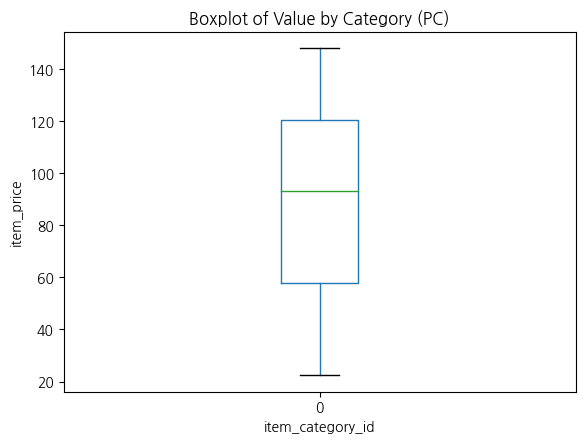

In [ ]:
# PC를 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([0])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (PC)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

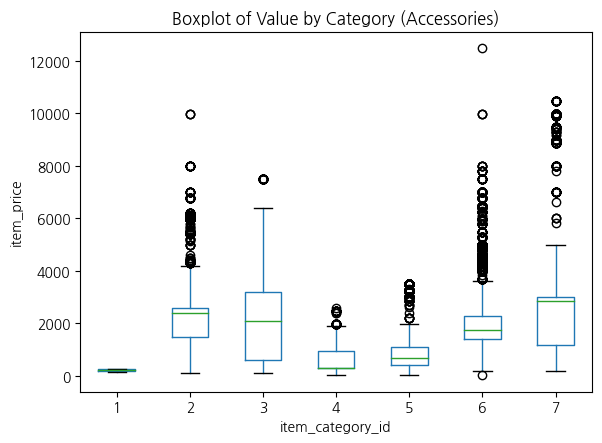

In [ ]:
# Accessories을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([1,2,3,4,5,6,7])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Accessories)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

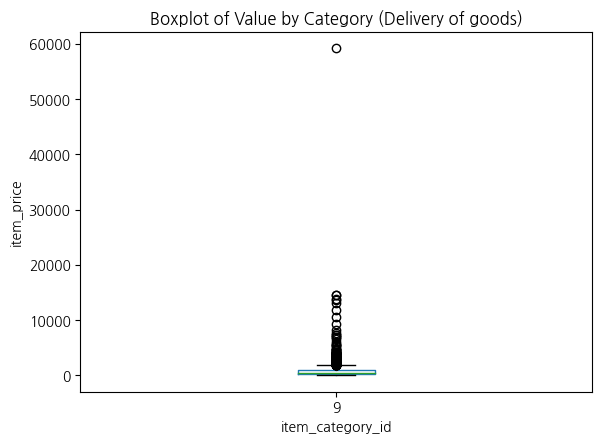

In [ ]:
# Delivery of goods을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([9])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Delivery of goods)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

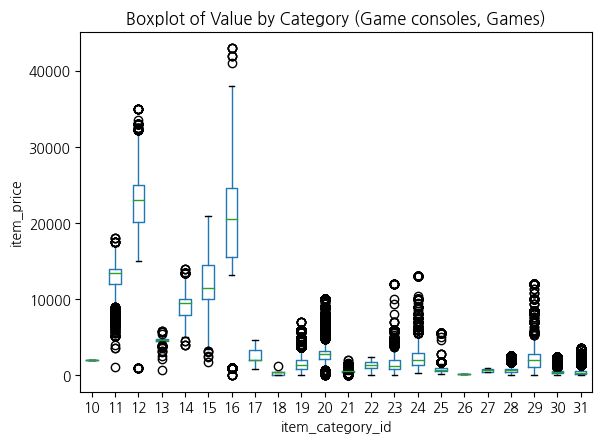

In [ ]:
# Game consoles, Games을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Game consoles, Games)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

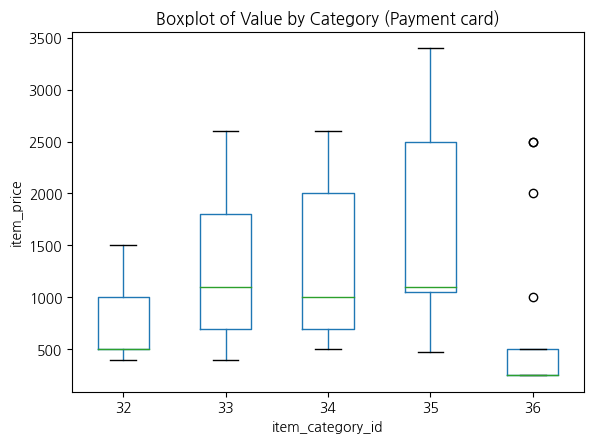

In [ ]:
# Payment card을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([32,33,34,35,36])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Payment card)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

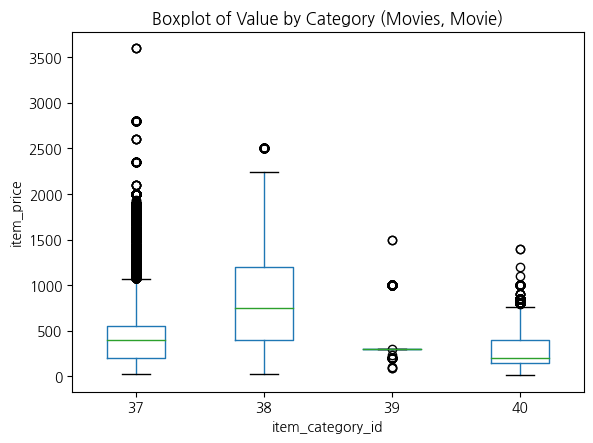

In [ ]:
# Movies, Movie을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([37,38,39,40])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Movies, Movie)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

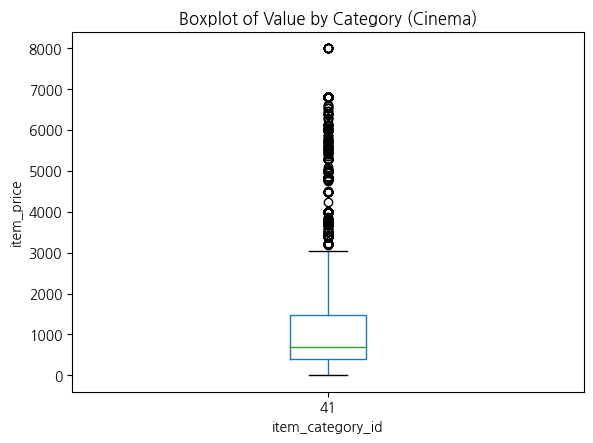

In [ ]:
# Cinema을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([41])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Cinema)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

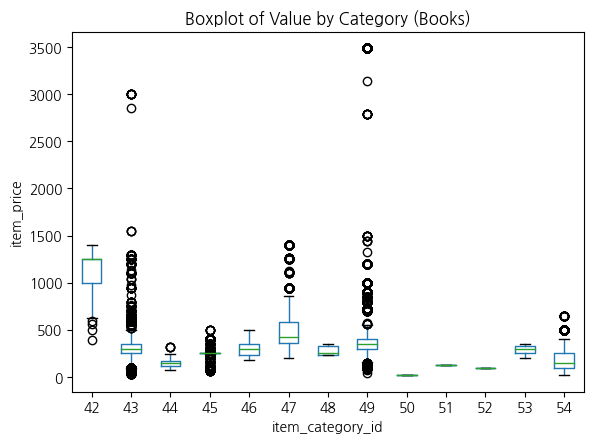

In [ ]:
# Books을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([42,43,44,45,46,47,48,49,50,51,52,53,54])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Books)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

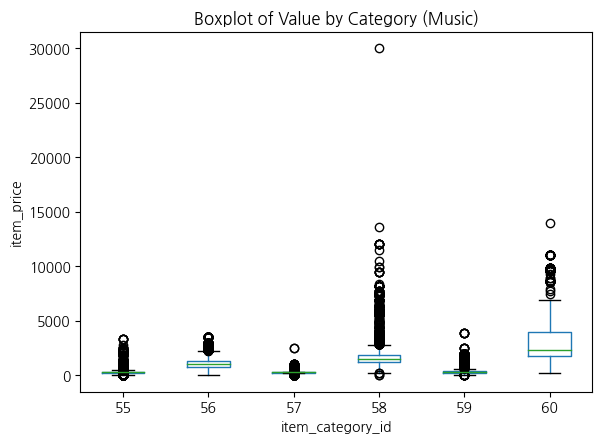

In [ ]:
# Music을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([55,56,57,58,59,60])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Music)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

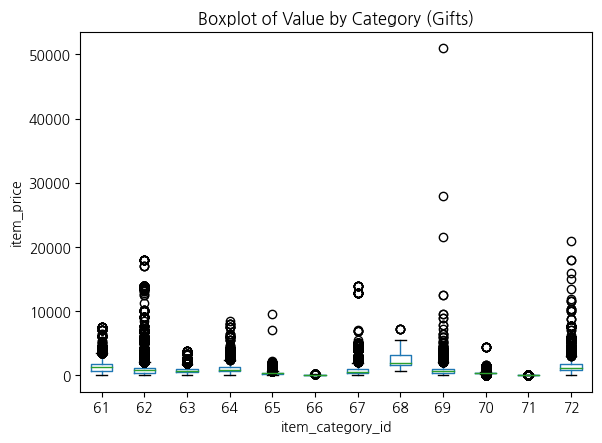

In [ ]:
# Gifts을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([61,62,63,64,65,66,67,68,69,70,71,72])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Gifts)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

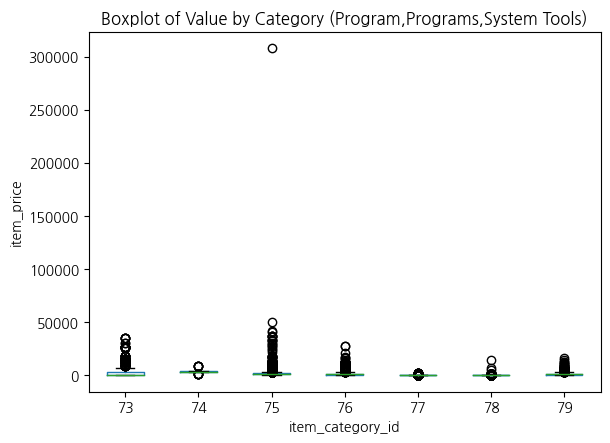

In [ ]:
# Program,Programs,System Tools을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([73,74,75,76,77,78,79])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Program,Programs,System Tools)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

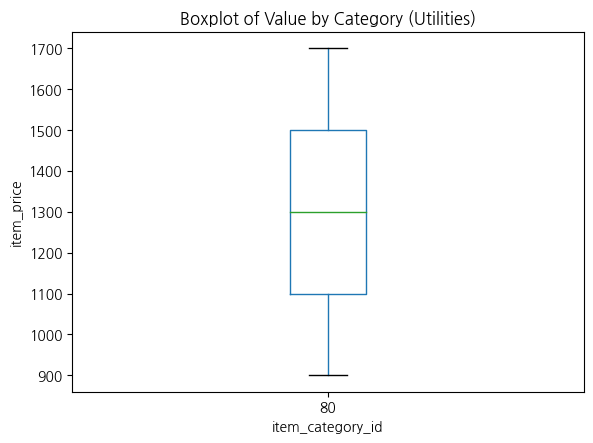

In [ ]:
# Utilities을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([80])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Utilities)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

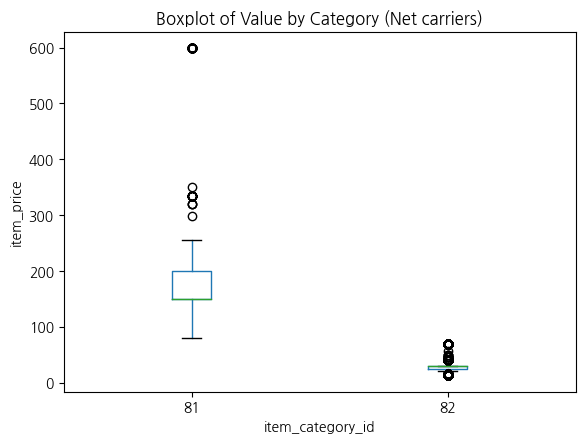

In [ ]:
# Net carriers을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([81,82])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (Net carriers)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

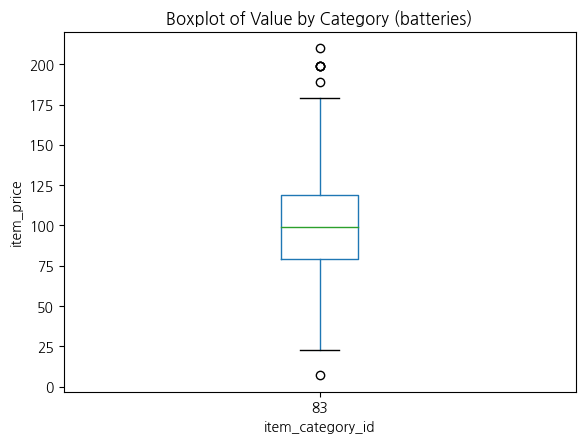

In [ ]:
# batteries을 가지는 행들만 선택
filtered_df = category_df[category_df['item_category_id'].isin([83])]

# Category 별로 박스플롯 생성
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='item_price', by='item_category_id', grid=False)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Value by Category (batteries)')
plt.suptitle('')  # 기본 부제목 제거
plt.xlabel('item_category_id')
plt.ylabel('item_price')

# 그래프 표시
plt.show()

In [ ]:
# 중복 행 확인
duplicates = train_marged[train_marged.duplicated()]

if duplicates.empty:
    print("중복 행이 없습니다.")
else:
    print("중복 행이 있습니다.")
    print(duplicates)

NameError: name 'train_marged' is not defined